In [1]:
# Librerias
import numpy as np
import pandas as pd
from difflib import SequenceMatcher

In [2]:
# Cargo metadata de gmaps ya filtrado en el etl
df_gmaps = pd.read_csv('C:/Users/54280/Documents/GitHub/proyectogrupal/Pruebas/gmaps_filtrado.csv')
# Cargo business de yeld ya filtrado en el etl
df_business = pd.read_parquet('C:/Users/54280/Documents/GitHub/proyectogrupal/Pruebas/business.parquet')

In [3]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
index,,,,,,,,,,,,,,
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:
# Genero un df unico para ambos df
df_merged = pd.merge(df_gmaps, df_business, on=['latitude', 'longitude'], how='inner')

In [9]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64629 entries, 3 to 150340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   64629 non-null  object 
 1   name          64629 non-null  object 
 2   address       64629 non-null  object 
 3   city          64629 non-null  object 
 4   state         64629 non-null  object 
 5   postal_code   64629 non-null  object 
 6   latitude      64629 non-null  float64
 7   longitude     64629 non-null  float64
 8   stars         64629 non-null  float64
 9   review_count  64629 non-null  int64  
 10  is_open       64629 non-null  int64  
 11  attributes    63752 non-null  object 
 12  categories    64629 non-null  object 
 13  hours         55293 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 7.4+ MB


In [10]:
df_gmaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441868 entries, 0 to 441867
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        441868 non-null  int64  
 1   name              441860 non-null  object 
 2   address           439290 non-null  object 
 3   gmap_id           441868 non-null  object 
 4   description       197047 non-null  object 
 5   latitude          441868 non-null  float64
 6   longitude         441868 non-null  float64
 7   category          441868 non-null  object 
 8   avg_rating        441868 non-null  float64
 9   num_of_reviews    441868 non-null  int64  
 10  price             244781 non-null  object 
 11  hours             401547 non-null  object 
 12  MISC              436358 non-null  object 
 13  state             402667 non-null  object 
 14  relative_results  371024 non-null  object 
 15  url               441868 non-null  object 
 16  estado_categoria  44

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4159 non-null   int64  
 1   name_x            4155 non-null   object 
 2   address_x         4159 non-null   object 
 3   gmap_id           4159 non-null   object 
 4   description       1450 non-null   object 
 5   latitude          4159 non-null   float64
 6   longitude         4159 non-null   float64
 7   category          4159 non-null   object 
 8   avg_rating        4159 non-null   float64
 9   num_of_reviews    4159 non-null   int64  
 10  price             1913 non-null   object 
 11  hours_x           3861 non-null   object 
 12  MISC              4141 non-null   object 
 13  state_x           3861 non-null   object 
 14  relative_results  2952 non-null   object 
 15  url               4159 non-null   object 
 16  estado_categoria  4159 non-null   object 


In [12]:
# Comparo diferencias en nombres 
son_iguales = df_merged['name_x'].equals(df_merged['name_y'])

In [13]:
# Filtro filas diferentes en nombres
filas_diferentes = df_merged[df_merged['name_x'] != df_merged['name_y']]

In [14]:
filas_diferentes.head(2)

,Unnamed: 0,name_x,address_x,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,...,address_y,city,state_y,postal_code,stars,review_count,is_open,attributes,categories,hours_y
0,17109,Brother Doug's Pizza Cafe,"Brother Doug's Pizza Cafe, 11005 Allisonville ...",0x8814b30f4c7d5b31:0x1e81e6866abca4b5,NaN,39.949625,-86.041843,pizza restaurant,4.8,21,...,11005 Allisonville Rd,Fishers,MO,46038,4.0,44,0,"{'NoiseLevel': 'u'quiet'', 'WiFi': 'u'free'', ...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
1,17109,Brother Doug's Pizza Cafe,"Brother Doug's Pizza Cafe, 11005 Allisonville ...",0x8814b30f4c7d5b31:0x1e81e6866abca4b5,NaN,39.949625,-86.041843,takeout restaurant,4.8,21,...,11005 Allisonville Rd,Fishers,MO,46038,4.0,44,0,"{'NoiseLevel': 'u'quiet'', 'WiFi': 'u'free'', ...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [15]:
# Filtrar las filas donde name_x y name_y son diferentes
filas_diferentes = df_merged[df_merged['name_x'] != df_merged['name_y']]

# Mostrar las columnas 'name_x' y 'name_y' junto con el índice
columnas_deseadas = ['name_x', 'name_y']
resultados = filas_diferentes[columnas_deseadas]

# Imprimir los resultados
print(resultados)


                                        name_x  \
0                    Brother Doug's Pizza Cafe   
1                    Brother Doug's Pizza Cafe   
2                    Brother Doug's Pizza Cafe   
3                    Brother Doug's Pizza Cafe   
4                                        Pomme   
...                                        ...   
4147              Rositas Cocina Original Mxcn   
4148              Rositas Cocina Original Mxcn   
4153  El Paso Mexican Grill On Magazine Street   
4154                                 Wing Shop   
4158                         RH Nashville Café   

                                       name_y  
0                   Brother Doug's Pizza Café  
1                   Brother Doug's Pizza Café  
2                   Brother Doug's Pizza Café  
3                   Brother Doug's Pizza Café  
4                            Pomme Restaurant  
...                                       ...  
4147     Rositas Cocina Original Mexican Food  
4148           

In [16]:
resultados

,name_x,name_y
0,Brother Doug's Pizza Cafe,Brother Doug's Pizza Café
1,Brother Doug's Pizza Cafe,Brother Doug's Pizza Café
2,Brother Doug's Pizza Cafe,Brother Doug's Pizza Café
3,Brother Doug's Pizza Cafe,Brother Doug's Pizza Café
4,Pomme,Pomme Restaurant
...,...,...
4147,Rositas Cocina Original Mxcn,Rositas Cocina Original Mexican Food
4148,Rositas Cocina Original Mxcn,Sonny's Italian Restaurant
4153,El Paso Mexican Grill On Magazine Street,El Paso Mexican Grill
4154,Wing Shop,Rocket Burger


In [17]:
# Función para calcular la similitud entre dos cadenas
def similarity(s1, s2):
    if isinstance(s1, str) and isinstance(s2, str):
        return str(SequenceMatcher(None, s1, s2).ratio())
    else:
        return 0.0  # Devolver 0.0 si no son cadenas

In [18]:
# Comapraro la similitud de los nombres y guarda en una nueva columna
df_merged['similarity'] = df_merged.apply(lambda row: similarity(row['name_x'], row['name_y']), axis=1)

In [19]:
# Veo el df
df_merged.head(2)

,Unnamed: 0,name_x,address_x,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,...,city,state_y,postal_code,stars,review_count,is_open,attributes,categories,hours_y,similarity
0,17109,Brother Doug's Pizza Cafe,"Brother Doug's Pizza Cafe, 11005 Allisonville ...",0x8814b30f4c7d5b31:0x1e81e6866abca4b5,NaN,39.949625,-86.041843,pizza restaurant,4.8,21,...,Fishers,MO,46038,4.0,44,0,"{'NoiseLevel': 'u'quiet'', 'WiFi': 'u'free'', ...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.96
1,17109,Brother Doug's Pizza Cafe,"Brother Doug's Pizza Cafe, 11005 Allisonville ...",0x8814b30f4c7d5b31:0x1e81e6866abca4b5,NaN,39.949625,-86.041843,takeout restaurant,4.8,21,...,Fishers,MO,46038,4.0,44,0,"{'NoiseLevel': 'u'quiet'', 'WiFi': 'u'free'', ...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.96


In [20]:
# Voy a reemplazar los nombres de la columna name_y con los de la nombres de la columna name_x cuando la similitud sea mayor a 0.7

# Defino un umbral de similitud
umbral_similitud = 0.7

# Reemplazo los valores en 'name_y' con 'name_x' cuando la similitud sea mayor o igual al umbral
df_merged['name_y'] = df_merged.apply(lambda row: row['name_x'] if float(row['similarity']) >= umbral_similitud else row['name_y'], axis=1)

In [23]:
# Filtro las filas donde name_x y name_y son diferentes
filas_diferentes = df_merged[df_merged['name_x'] != df_merged['name_y']]

# Mostro las columnas 'name_x' y 'name_y' junto con el índice
columnas_deseadas = ['name_x', 'name_y','similarity']
resultados = filas_diferentes[columnas_deseadas]

# Veo los resultados
resultados.head(50)


,name_x,name_y,similarity
4,Pomme,Pomme Restaurant,0.47619047619047616
5,Pomme,Pomme Restaurant,0.47619047619047616
6,Pomme,Pomme Restaurant,0.47619047619047616
7,Pomme,Pomme Restaurant,0.47619047619047616
8,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889
9,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889
10,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889
11,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889
12,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889
13,AK Preps & Bakery,AK PREPS AND BAKERY,0.3888888888888889


Veo que la escala que tome es demasiado grande en 0.7 ya que hasta el 0.38 tenemos restaurant que tiene casi los mismo nombres y no entran por tener un adicional en el nombre o estar en mayusculas. Vuelvo a ajustar el umbral.

In [24]:
# Defino un umbral de similitud
umbral_similitud = 0.38

# Reemplazo los valores en 'name_y' con 'name_x' cuando la similitud sea mayor o igual al umbral
df_merged['name_y'] = df_merged.apply(lambda row: row['name_x'] if float(row['similarity']) >= umbral_similitud else row['name_y'], axis=1)

In [25]:
# Filtro las filas donde name_x y name_y son diferentes
filas_diferentes = df_merged[df_merged['name_x'] != df_merged['name_y']]

# Mostro las columnas 'name_x' y 'name_y' junto con el índice
columnas_deseadas = ['name_x', 'name_y','similarity']
resultados = filas_diferentes[columnas_deseadas]

# Veo los resultados
resultados.head(50)

,name_x,name_y,similarity
16,Sweet Life Cakes and Desserts,Bakery 519,0.20512820512820512
17,Sweet Life Cakes and Desserts,Bakery 519,0.20512820512820512
19,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
20,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
21,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
22,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
23,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
24,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
25,Family Traditions Restaurant,Dana's Cafe,0.2564102564102564
26,Family Traditions Restaurant,Dana's Cafe,0.2564102564102564


In [26]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 16 to 4154
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_x      1890 non-null   object
 1   name_y      1894 non-null   object
 2   similarity  1894 non-null   object
dtypes: object(3)
memory usage: 59.2+ KB


Tomo nocion que tenemos datos faltantes en name_x pero no en name_y con lo cual lo voy a explorar

In [27]:
# Verifico qué filas en 'name_x' tienen valores nulos
filas_con_nulos = df_merged[df_merged['name_x'].isnull()]

Voy a reemplazar los valores faltantes de name_x con los de name_y

In [28]:
# Reemplazar los valores nulos en 'name_x' con los valores de 'name_y'
df_merged['name_x'].fillna(df_merged['name_y'], inplace=True)

In [29]:
# Filtro las filas donde name_x y name_y son diferentes
filas_diferentes = df_merged[df_merged['name_x'] != df_merged['name_y']]

# Mostro las columnas 'name_x' y 'name_y' junto con el índice
columnas_deseadas = ['name_x', 'name_y','similarity']
resultados = filas_diferentes[columnas_deseadas]

# Veo los resultados
resultados.head(50)

,name_x,name_y,similarity
16,Sweet Life Cakes and Desserts,Bakery 519,0.20512820512820512
17,Sweet Life Cakes and Desserts,Bakery 519,0.20512820512820512
19,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
20,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
21,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
22,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
23,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
24,Ricardo's Mexican Restaurant & Taqueria,Dana's Cafe,0.2
25,Family Traditions Restaurant,Dana's Cafe,0.2564102564102564
26,Family Traditions Restaurant,Dana's Cafe,0.2564102564102564


In [30]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1890 entries, 16 to 4154
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_x      1890 non-null   object
 1   name_y      1890 non-null   object
 2   similarity  1890 non-null   object
dtypes: object(3)
memory usage: 59.1+ KB


Investigando las diferencias encuentro que varios de los casos corresponden a tiendas que estan en un shopping y algunos restauranes estan en la base de yelp y otros en la gmpas con lo cual procedo a eliminarlos ya que no representan un valor que nos modifique a los analisis que vamos a hacer

In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4159 non-null   int64  
 1   name_x            4159 non-null   object 
 2   address_x         4159 non-null   object 
 3   gmap_id           4159 non-null   object 
 4   description       1450 non-null   object 
 5   latitude          4159 non-null   float64
 6   longitude         4159 non-null   float64
 7   category          4159 non-null   object 
 8   avg_rating        4159 non-null   float64
 9   num_of_reviews    4159 non-null   int64  
 10  price             1913 non-null   object 
 11  hours_x           3861 non-null   object 
 12  MISC              4141 non-null   object 
 13  state_x           3861 non-null   object 
 14  relative_results  2952 non-null   object 
 15  url               4159 non-null   object 
 16  estado_categoria  4159 non-null   object 


In [32]:
# Elimino de df_merged las filas que excluyan los índices de 'resultados'
df_merged = df_merged.drop(resultados.index)

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2269 entries, 0 to 4158
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2269 non-null   int64  
 1   name_x            2269 non-null   object 
 2   address_x         2269 non-null   object 
 3   gmap_id           2269 non-null   object 
 4   description       909 non-null    object 
 5   latitude          2269 non-null   float64
 6   longitude         2269 non-null   float64
 7   category          2269 non-null   object 
 8   avg_rating        2269 non-null   float64
 9   num_of_reviews    2269 non-null   int64  
 10  price             1210 non-null   object 
 11  hours_x           2142 non-null   object 
 12  MISC              2260 non-null   object 
 13  state_x           2142 non-null   object 
 14  relative_results  1681 non-null   object 
 15  url               2269 non-null   object 
 16  estado_categoria  2269 non-null   object 
 17  

In [35]:
# Creo un nuevo df con las columnas 'business_id' y 'gmap_id' el mismo lo vamos a usar para la union de los restaurantes que estan en ambas plataformas
df_union_yeld_and_gmaps = df_merged[['business_id', 'gmap_id']]

In [36]:
df_union_yeld_and_gmaps.to_csv('df_union_yeld_and_gmaps.csv')

In [38]:
import numpy as np

# Convertir grados a radianes
df_business['latitude_rad'] = np.radians(df_business['latitude'])
df_business['longitude_rad'] = np.radians(df_business['longitude'])

df_gmaps['latitude_rad'] = np.radians(df_gmaps['latitude'])
df_gmaps['longitude_rad'] = np.radians(df_gmaps['longitude'])


In [40]:
from geopy.distance import great_circle
import pandas as pd

# Supongamos que tienes dos DataFrames: df_business y df_gmaps

# Función para calcular la distancia de Haversine
def haversine_distance(row):
    coords_business = (row['latitude'], row['longitude'])  # Coordenadas de df_business
    coords_gmaps = (row['latitude'], row['longitude'])     # Coordenadas de df_gmaps
    return great_circle(coords_business, coords_gmaps).kilometers

# Aplicar la función para calcular la distancia de Haversine y crear una nueva columna
df_business['haversine_distance'] = df_business.apply(haversine_distance, axis=1)

# df_business ahora contiene la columna 'haversine_distance' con la distancia de Haversine



In [41]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64629 entries, 3 to 150340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         64629 non-null  object 
 1   name                64629 non-null  object 
 2   address             64629 non-null  object 
 3   city                64629 non-null  object 
 4   state               64629 non-null  object 
 5   postal_code         64629 non-null  object 
 6   latitude            64629 non-null  float64
 7   longitude           64629 non-null  float64
 8   stars               64629 non-null  float64
 9   review_count        64629 non-null  int64  
 10  is_open             64629 non-null  int64  
 11  attributes          63752 non-null  object 
 12  categories          64629 non-null  object 
 13  hours               55293 non-null  object 
 14  latitude_rad        64629 non-null  float64
 15  longitude_rad       64629 non-null  float64
 16  haversin

In [43]:
df_business.head(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,latitude_rad,longitude_rad,haversine_distance
index,,,,,,,,,,,,,,,,,
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0.697355,-1.311712,0.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",0.704034,-1.317229,0.0
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",0.633024,-1.519465,0.0
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,0.673089,-1.576400,0.0


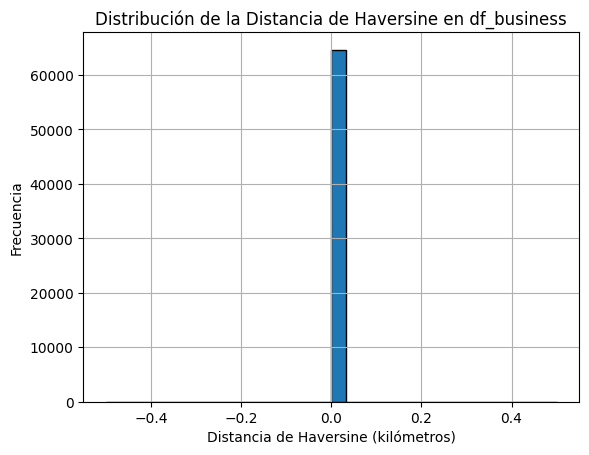

In [44]:
import matplotlib.pyplot as plt

# Creo un histograma de la distancia de Haversine
plt.hist(df_business['haversine_distance'], bins=30, edgecolor='k')
plt.xlabel('Distancia de Haversine (kilómetros)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Distancia de Haversine en df_business')
plt.grid(True)
plt.show()

In [45]:
# Uno los DataFrames utilizando las columnas 'latitude_rad' y 'longitude_rad'
df_merged2 = df_business.merge(df_gmaps, on=['latitude_rad', 'longitude_rad'], how='inner')

In [46]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         4160 non-null   object 
 1   name_x              4160 non-null   object 
 2   address_x           4160 non-null   object 
 3   city                4160 non-null   object 
 4   state_x             4160 non-null   object 
 5   postal_code         4160 non-null   object 
 6   latitude_x          4160 non-null   float64
 7   longitude_x         4160 non-null   float64
 8   stars               4160 non-null   float64
 9   review_count        4160 non-null   int64  
 10  is_open             4160 non-null   int64  
 11  attributes          4081 non-null   object 
 12  categories          4160 non-null   object 
 13  hours_x             3684 non-null   object 
 14  latitude_rad        4160 non-null   float64
 15  longitude_rad       4160 non-null   float64
 16  havers

In [52]:
# Redondear las coordenadas en ambos DataFrames
df_business['latitude_rounded'] = df_business['latitude'].round(2)
df_business['longitude_rounded'] = df_business['longitude'].round(2)

df_gmaps['latitude_rounded'] = df_gmaps['latitude'].round(2)
df_gmaps['longitude_rounded'] = df_gmaps['longitude'].round(2)

# Unir los DataFrames utilizando las columnas redondeadas
df_merged = df_business.merge(df_gmaps, on=['latitude_rounded', 'longitude_rounded'], how='inner')

# Eliminar las columnas redondeadas si ya no son necesarias
df_business.drop(['latitude_rounded', 'longitude_rounded'], axis=1, inplace=True)
df_gmaps.drop(['latitude_rounded', 'longitude_rounded'], axis=1, inplace=True)

In [51]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15526 entries, 0 to 15525
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         15526 non-null  object 
 1   name_x              15526 non-null  object 
 2   address_x           15526 non-null  object 
 3   city                15526 non-null  object 
 4   state_x             15526 non-null  object 
 5   postal_code         15526 non-null  object 
 6   latitude_x          15526 non-null  float64
 7   longitude_x         15526 non-null  float64
 8   stars               15526 non-null  float64
 9   review_count        15526 non-null  int64  
 10  is_open             15526 non-null  int64  
 11  attributes          15239 non-null  object 
 12  categories          15526 non-null  object 
 13  hours_x             13661 non-null  object 
 14  latitude_rad_x      15526 non-null  float64
 15  longitude_rad_x     15526 non-null  float64
 16  have

In [53]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64629 entries, 3 to 150340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         64629 non-null  object 
 1   name                64629 non-null  object 
 2   address             64629 non-null  object 
 3   city                64629 non-null  object 
 4   state               64629 non-null  object 
 5   postal_code         64629 non-null  object 
 6   latitude            64629 non-null  float64
 7   longitude           64629 non-null  float64
 8   stars               64629 non-null  float64
 9   review_count        64629 non-null  int64  
 10  is_open             64629 non-null  int64  
 11  attributes          63752 non-null  object 
 12  categories          64629 non-null  object 
 13  hours               55293 non-null  object 
 14  latitude_rad        64629 non-null  float64
 15  longitude_rad       64629 non-null  float64
 16  haversin

In [55]:
df_gmaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441868 entries, 0 to 441867
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        441868 non-null  int64  
 1   name              441860 non-null  object 
 2   address           439290 non-null  object 
 3   gmap_id           441868 non-null  object 
 4   description       197047 non-null  object 
 5   latitude          441868 non-null  float64
 6   longitude         441868 non-null  float64
 7   category          441868 non-null  object 
 8   avg_rating        441868 non-null  float64
 9   num_of_reviews    441868 non-null  int64  
 10  price             244781 non-null  object 
 11  hours             401547 non-null  object 
 12  MISC              436358 non-null  object 
 13  state             402667 non-null  object 
 14  relative_results  371024 non-null  object 
 15  url               441868 non-null  object 
 16  estado_categoria  44

In [56]:
import pandas as pd
from geopy.distance import great_circle

# Supongamos que tienes dos DataFrames: df_business y df_gmaps

# Define un umbral en kilómetros
umbral_km = 1.0  # Puedes ajustar este valor según tus necesidades

# Función para calcular la distancia de Haversine entre dos coordenadas
def haversine_distance(row):
    coords_business = (row['latitude'], row['longitude'])  # Coordenadas de df_business
    coords_gmaps = (row['latitude'], row['longitude'])     # Coordenadas de df_gmaps
    return great_circle(coords_business, coords_gmaps).kilometers

# Aplicar la función para calcular la distancia de Haversine y crear una nueva columna
df_business['haversine_distance'] = df_business.apply(haversine_distance, axis=1)

# Realizar la unión aplicando el umbral
df_merged3 = df_business[df_business['haversine_distance'] <= umbral_km].merge(df_gmaps, on=['latitude', 'longitude'], how='inner')

# df_merged contendrá las filas donde la distancia de Haversine es menor o igual al umbral


In [58]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         4159 non-null   object 
 1   name_x              4159 non-null   object 
 2   address_x           4159 non-null   object 
 3   city                4159 non-null   object 
 4   state_x             4159 non-null   object 
 5   postal_code         4159 non-null   object 
 6   latitude            4159 non-null   float64
 7   longitude           4159 non-null   float64
 8   stars               4159 non-null   float64
 9   review_count        4159 non-null   int64  
 10  is_open             4159 non-null   int64  
 11  attributes          4080 non-null   object 
 12  categories          4159 non-null   object 
 13  hours_x             3683 non-null   object 
 14  latitude_rad_x      4159 non-null   float64
 15  longitude_rad_x     4159 non-null   float64
 16  havers

In [59]:
import pandas as pd
from geopy.distance import great_circle
from fuzzywuzzy import fuzz

# Supongamos que tienes dos DataFrames: df_business y df_gmaps

# Define un umbral en kilómetros y un umbral de similitud en el nombre
umbral_km = 1.0  # Umbral de distancia geográfica
umbral_similitud_nombre = 90  # Umbral de similitud en el nombre (ajusta según tus necesidades)

# Función para calcular la distancia de Haversine entre dos coordenadas
def haversine_distance(row):
    coords_business = (row['latitude'], row['longitude'])  # Coordenadas de df_business
    coords_gmaps = (row['latitude'], row['longitude'])     # Coordenadas de df_gmaps
    return great_circle(coords_business, coords_gmaps).kilometers

# Aplicar la función para calcular la distancia de Haversine y crear una nueva columna
df_business['haversine_distance'] = df_business.apply(haversine_distance, axis=1)

# Realizar la unión aplicando el umbral de distancia geográfica
df_merged4 = df_business[df_business['haversine_distance'] <= umbral_km].copy()

# Función para calcular la similitud en el nombre
def calcular_similitud_nombre(row):
    return fuzz.ratio(row['name_x'], row['name_y'])

# Aplicar la función para calcular la similitud en el nombre y crear una nueva columna
df_merged4['similitud_nombre'] = df_merged.apply(calcular_similitud_nombre, axis=1)

# Filtrar filas con similitud en el nombre por encima del umbral
df_merged4 = df_merged[df_merged['similitud_nombre'] >= umbral_similitud_nombre]

# df_merged contendrá las filas donde la distancia de Haversine es menor o igual al umbral y la similitud en el nombre es mayor o igual al umbral


ModuleNotFoundError: No module named 'fuzzywuzzy'